In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
file_train = open('/Users/Raju Yadav/Downloads/train_cc.csv')
file_test = open('/Users/Raju Yadav/Downloads/test_cc.csv')
file_submission = open('/Users/Raju Yadav/Downloads/sample_submission_cc.csv')

In [3]:
train = pd.read_csv(file_train)
test = pd.read_csv(file_test)
submission = pd.read_csv(file_submission)

In [4]:
train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [5]:
test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


In [6]:
submission.head(10)

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
5,MZZAQMPT,0
6,Y88TW36I,0
7,3UGOAQNU,0
8,VVUKMUJT,0
9,9R363ZXS,0


In [7]:
submission[submission['Is_Lead'] == 1]

,ID,Is_Lead


In [8]:
train.shape , test.shape

((245725, 11), (105312, 10))

There are 245725 training sets and 105312 test sets

In [9]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [10]:
train.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [11]:
test.Credit_Product.isna().sum()

12522

In [12]:
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [13]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

Only Credit_Product has nan values nad rest all columns have are good

Lets find out if we can find any relationship of Credit_Product with other columns to fill the Nan values

<AxesSubplot:>

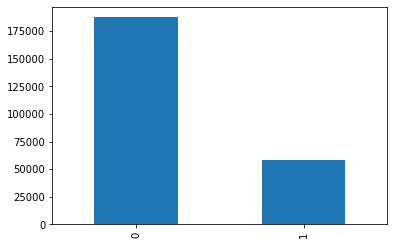

In [14]:
train.Is_Lead.value_counts().plot(kind = 'bar')

We can see that is imbalanced training set so we have to tackle this problem also.

In [15]:
train['Credit_Product'].fillna('Yes',inplace= True)
test['Credit_Product'].fillna('Yes',inplace= True)

In [16]:
train.Credit_Product.value_counts()

No     144357
Yes    101368
Name: Credit_Product, dtype: int64

In [17]:
train.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [18]:
label_encoder = LabelEncoder()

In [19]:
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Region_Code'] = label_encoder.fit_transform(train['Region_Code'])
train['Occupation'] = label_encoder.fit_transform(train['Occupation'])
train['Channel_Code'] = label_encoder.fit_transform(train['Channel_Code'])
train['Credit_Product'] = label_encoder.fit_transform(train['Credit_Product'])
train['Is_Active'] = label_encoder.fit_transform(train['Is_Active'])

test['Gender'] = label_encoder.fit_transform(test['Gender'])
test['Region_Code'] = label_encoder.fit_transform(test['Region_Code'])
test['Occupation'] = label_encoder.fit_transform(test['Occupation'])
test['Channel_Code'] = label_encoder.fit_transform(test['Channel_Code'])
test['Credit_Product'] = label_encoder.fit_transform(test['Credit_Product'])
test['Is_Active'] = label_encoder.fit_transform(test['Is_Active'])



# Creating BaseLine Model using RandomForestClassifier

In [20]:
labels = train['Is_Lead']
train = train.drop(['Is_Lead','ID'],axis = 1)

test = test.drop(['ID'],axis = 1)

In [21]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,1045696,0
1,0,30,27,2,0,32,0,581988,0
2,0,56,18,3,2,26,0,1484315,1
3,1,34,20,2,0,19,0,470454,0
4,0,30,32,2,0,33,0,886787,0


In [22]:
X_train,X_test,y_train,y_test = train_test_split(train,labels,test_size =0.2,random_state = 48)

In [23]:
paramters = {
    'n_estimators' : list(np.arange(500,1800,100)),
    'criterion' : ('gini','entropy'),
    'max_depth' : list(np.arange(3,7,1)),
    'min_samples_leaf' : list(np.arange(25,100,10))
}

In [24]:
clf = GridSearchCV(RandomForestClassifier(),param_grid = paramters,cv = 5,verbose = True)
model = clf.fit(X_train,X_test)

Fitting 5 folds for each of 832 candidates, totalling 4160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
model.best_estimator_

In [ ]:
model.best_score_

In [ ]:
predict_values = clf.predict(y_train)

In [ ]:
roc_auc_score(y_test,predict_values)

predict = clf.predict(test)

submission['Is_Lead'] = predict

submission[submission['Is_Lead'] == 1]

submission.to_csv("submission.csv", index = False)